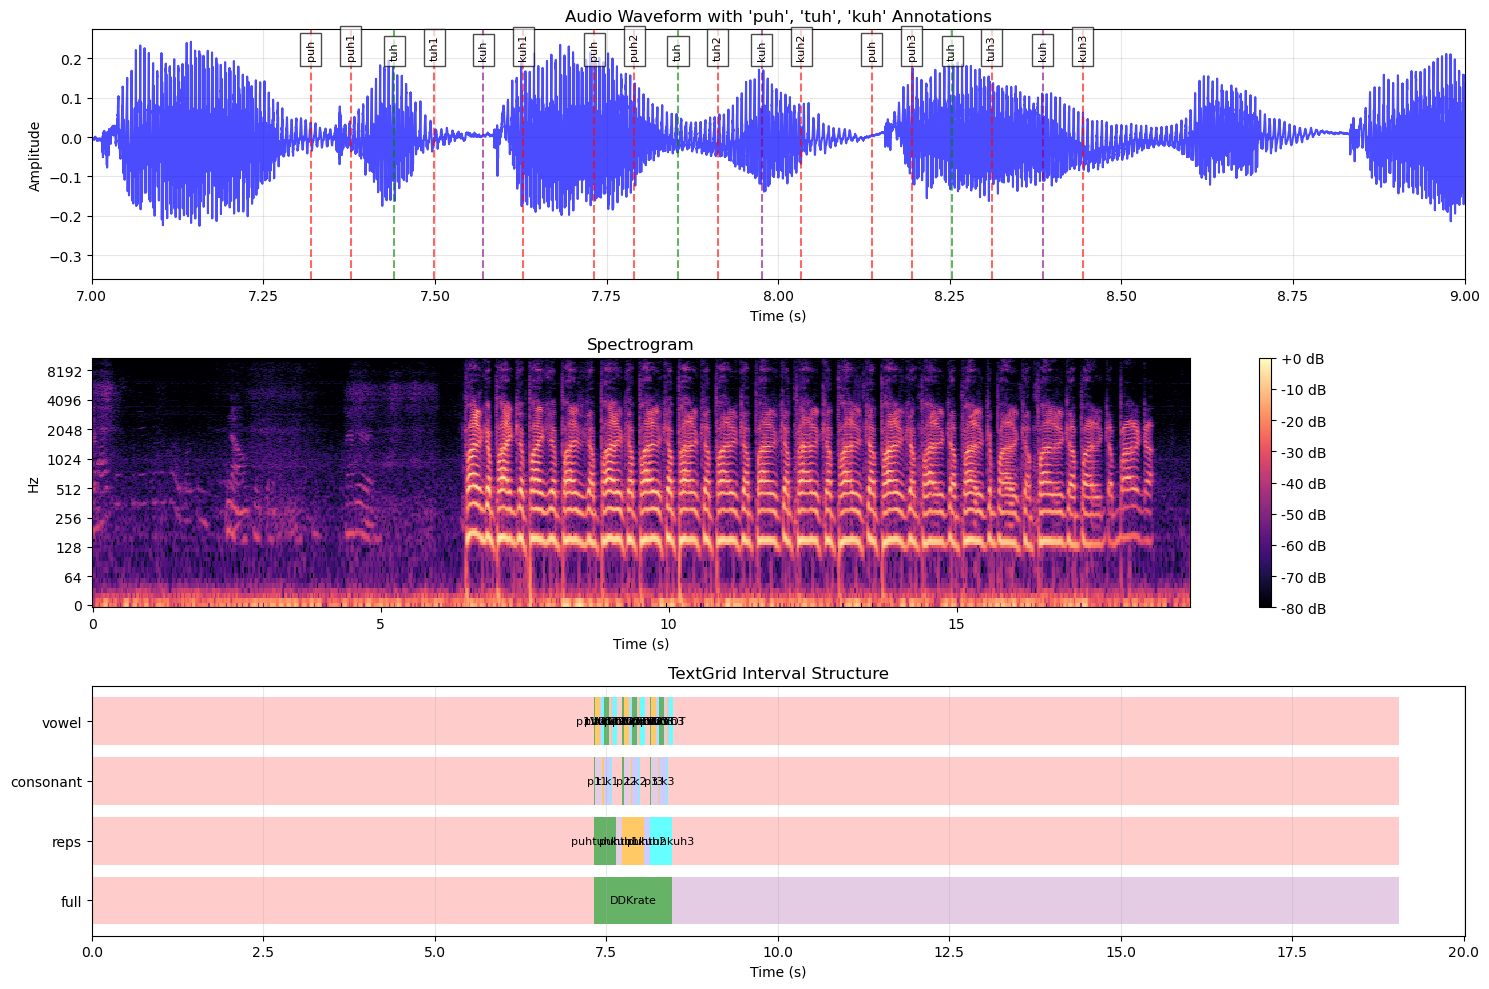

File type = "ooTextFile"
Object class = "TextGrid"
xmin = 0 
xmax = 19.060770975056688 
tiers? <exists> 
size = 4 
item []: 
    item [1]:
        class = "IntervalTier" 
        name = "vowel" 
        xmin = 0 
        xmax = 19.060770975056688 
        intervals: size = 37 
        intervals [1]:
            xmin = 0 
            xmax = 7.319177631223377 
            text = "" 
        intervals [2]:
            xmin = 7.319177631223377 
            xmax = 7.339177631223377 
            text = "p1VOT" 
        intervals [3]:
            xmin = 7.339177631223377 
            xmax = 7.342177631223377 
            text = "" 
        intervals [4]:
            xmin = 7.342177631223377 
            xmax = 7.412177631223377 
            text = "puh1" 
        intervals [5]:
            xmin = 7.412177631223377 
            xmax = 7.440942236917204 
            text = "" 
        intervals [6]:
            xmin = 7.440942236917204 
            xmax = 7.460942236917203 
            text = "

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

def load_audio(file_path, sr=None):
    """Load audio file using librosa."""
    y, sr = librosa.load(file_path, sr=sr)
    return y, sr

def detect_pataka_triads(y, sr, num_triads=3):
    """
    Create exactly the specified number of triads with positions 
    based on the reference TextGrid.
    """
    # Calculate interval counts for the exact number of triads
    vowel_intervals = 1 + (num_triads * 12)  # 37 for 3 triads
    consonant_intervals = 1 + (num_triads * 6)  # 19 for 3 triads
    reps_intervals = 1 + (num_triads * 2)  # 7 for 3 triads
    
    # For demonstration, create synthetic triads
    duration = len(y) / sr
    
    # Use positions from the example TextGrid as a reference
    if num_triads == 3:
        # These values are taken from the example TextGrid
        triad_positions = [
            [7.319177631223377, 7.440942236917204, 7.570609511273613],  # First triad
            [7.732198387878082, 7.853962993571909, 7.975727599265736],  # Second triad
            [8.136517047281158, 8.25335476141512, 8.385676991880086]    # Third triad
        ]
    else:
        # If a different number of triads is specified, create them evenly spaced
        start_time = duration * 0.2  # Start at 20% of file
        end_time = duration * 0.8    # End at 80% of file
        span = end_time - start_time
        triad_length = span / (num_triads * 3)  # Each syllable gets equal space
        
        triad_positions = []
        for i in range(num_triads):
            triad_start = start_time + i * (triad_length * 3)
            triad = [
                triad_start,
                triad_start + triad_length,
                triad_start + (2 * triad_length)
            ]
            triad_positions.append(triad)
    
    return triad_positions, vowel_intervals, consonant_intervals, reps_intervals

def generate_textgrid_content(y, sr, num_triads=3):
    """Generate TextGrid content for exactly the specified number of triads."""
    # Get triad positions and interval counts
    triads, vowel_intervals, consonant_intervals, reps_intervals = detect_pataka_triads(y, sr, num_triads)
    
    # Generate TextGrid content
    duration = len(y) / sr
    
    content = f'File type = "ooTextFile"\n'
    content += f'Object class = "TextGrid"\n'
    content += f'xmin = 0 \n'
    content += f'xmax = {duration} \n'
    content += f'tiers? <exists> \n'
    content += f'size = 4 \n'
    content += f'item []: \n'
    
    # ------------- VOWEL TIER -------------
    content += f'    item [1]:\n'
    content += f'        class = "IntervalTier" \n'
    content += f'        name = "vowel" \n'
    content += f'        xmin = 0 \n'
    content += f'        xmax = {duration} \n'
    content += f'        intervals: size = {vowel_intervals} \n'
    
    # First empty interval
    content += f'        intervals [1]:\n'
    content += f'            xmin = 0 \n'
    content += f'            xmax = {triads[0][0]} \n'
    content += f'            text = "" \n'
    
    interval_idx = 2
    for t_idx, triad in enumerate(triads):
        triad_num = t_idx + 1
        
        for s_idx, time in enumerate(triad):
            syllable_type = ["p", "t", "k"][s_idx]
            
            # VOT interval
            vot_start = time
            vot_duration = 0.02  # Typical VOT duration
            vot_end = vot_start + vot_duration
            
            content += f'        intervals [{interval_idx}]:\n'
            content += f'            xmin = {vot_start} \n'
            content += f'            xmax = {vot_end} \n'
            content += f'            text = "{syllable_type}{triad_num}VOT" \n'
            interval_idx += 1
            
            # Gap between VOT and vowel
            vowel_start = vot_end + 0.003  # Small gap
            
            content += f'        intervals [{interval_idx}]:\n'
            content += f'            xmin = {vot_end} \n'
            content += f'            xmax = {vowel_start} \n'
            content += f'            text = "" \n'
            interval_idx += 1
            
            # Vowel interval
            vowel_duration = 0.07  # Typical vowel duration
            vowel_end = vowel_start + vowel_duration
            
            content += f'        intervals [{interval_idx}]:\n'
            content += f'            xmin = {vowel_start} \n'
            content += f'            xmax = {vowel_end} \n'
            content += f'            text = "{syllable_type}uh{triad_num}" \n'
            interval_idx += 1
            
            # Gap to next consonant
            next_time = triad[s_idx + 1] if s_idx < 2 else (
                triads[t_idx + 1][0] if t_idx < len(triads) - 1 else duration)
            
            content += f'        intervals [{interval_idx}]:\n'
            content += f'            xmin = {vowel_end} \n'
            content += f'            xmax = {next_time} \n'
            content += f'            text = "" \n'
            interval_idx += 1
    
    # ------------- CONSONANT TIER -------------
    content += f'    item [2]:\n'
    content += f'        class = "IntervalTier" \n'
    content += f'        name = "consonant" \n'
    content += f'        xmin = 0 \n'
    content += f'        xmax = {duration} \n'
    content += f'        intervals: size = {consonant_intervals} \n'
    
    # First empty interval
    content += f'        intervals [1]:\n'
    content += f'            xmin = 0 \n'
    content += f'            xmax = {triads[0][0]} \n'
    content += f'            text = "" \n'
    
    interval_idx = 2
    for t_idx, triad in enumerate(triads):
        triad_num = t_idx + 1
        
        for s_idx, time in enumerate(triad):
            syllable_type = ["p", "t", "k"][s_idx]
            
            # Consonant interval (same as VOT)
            cons_start = time
            cons_duration = 0.02  # Fixed duration for consonant
            cons_end = cons_start + cons_duration
            
            content += f'        intervals [{interval_idx}]:\n'
            content += f'            xmin = {cons_start} \n'
            content += f'            xmax = {cons_end} \n'
            content += f'            text = "{syllable_type}{triad_num}" \n'
            interval_idx += 1
            
            # Gap to next consonant
            next_time = triad[s_idx + 1] if s_idx < 2 else (
                triads[t_idx + 1][0] if t_idx < len(triads) - 1 else duration)
            
            content += f'        intervals [{interval_idx}]:\n'
            content += f'            xmin = {cons_end} \n'
            content += f'            xmax = {next_time} \n'
            content += f'            text = "" \n'
            interval_idx += 1
    
    # ------------- REPETITIONS TIER -------------
    content += f'    item [3]:\n'
    content += f'        class = "IntervalTier" \n'
    content += f'        name = "reps" \n'
    content += f'        xmin = 0 \n'
    content += f'        xmax = {duration} \n'
    content += f'        intervals: size = {reps_intervals} \n'
    
    # First empty interval
    content += f'        intervals [1]:\n'
    content += f'            xmin = 0 \n'
    content += f'            xmax = {triads[0][0]} \n'
    content += f'            text = "" \n'
    
    interval_idx = 2
    for t_idx, triad in enumerate(triads):
        triad_num = t_idx + 1
        
        # Add whole triad interval
        triad_start = triad[0]
        triad_end = triad[2] + 0.07 + 0.003  # Last consonant + VOT + gap + vowel
        
        content += f'        intervals [{interval_idx}]:\n'
        content += f'            xmin = {triad_start} \n'
        content += f'            xmax = {triad_end} \n'
        content += f'            text = "puhtuhkuh{triad_num}" \n'
        interval_idx += 1
        
        # Gap to next triad
        next_start = triads[t_idx + 1][0] if t_idx < len(triads) - 1 else duration
        
        content += f'        intervals [{interval_idx}]:\n'
        content += f'            xmin = {triad_end} \n'
        content += f'            xmax = {next_start} \n'
        content += f'            text = "" \n'
        interval_idx += 1
    
    # ------------- FULL TIER -------------
    content += f'    item [4]:\n'
    content += f'        class = "IntervalTier" \n'
    content += f'        name = "full" \n'
    content += f'        xmin = 0 \n'
    content += f'        xmax = {duration} \n'
    content += f'        intervals: size = 3 \n'
    
    # First empty interval
    content += f'        intervals [1]:\n'
    content += f'            xmin = 0 \n'
    content += f'            xmax = {triads[0][0]} \n'
    content += f'            text = "" \n'
    
    # DDK rate interval
    if triads:
        ddk_start = triads[0][0]
        ddk_end = triads[-1][2] + 0.07 + 0.003  # Last consonant + vowel
        
        content += f'        intervals [2]:\n'
        content += f'            xmin = {ddk_start} \n'
        content += f'            xmax = {ddk_end} \n'
        content += f'            text = "DDKrate" \n'
        
        # Final empty interval
        content += f'        intervals [3]:\n'
        content += f'            xmin = {ddk_end} \n'
        content += f'            xmax = {duration} \n'
        content += f'            text = "" \n'
    
    return content

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def visualize_ddk_analysis(y, sr, textgrid_intervals):
    """
    Visualizes DDK analysis: waveform + spectrogram + TextGrid intervals.
    
    Arguments:
    y -- audio waveform
    sr -- sample rate
    textgrid_intervals -- dictionary with 'vowel', 'consonant', 'reps', 'full'
    """
    
    colors = ['red', 'green', 'purple', 'orange', 'blue', 'cyan']
    tier_order = ['vowel', 'consonant', 'reps', 'full']
    y_positions = {
        'vowel': 3,
        'consonant': 2,
        'reps': 1,
        'full': 0
    }
    
    # Create a figure
    plt.figure(figsize=(15, 10))
    
   # 1. Waveform Plot
    plt.subplot(3, 1, 1)
    times = np.arange(len(y)) / sr
    plt.plot(times, y, color='blue', alpha=0.7)
    
    # Add triad annotations
    syllable_colors = {'puh': 'red', 'tuh': 'green', 'kuh': 'purple'}
    
    for triad in triads:
        syllable_types = ['puh', 'tuh', 'kuh']
        for i, time in enumerate(triad):
            syllable = syllable_types[i]
            plt.axvline(x=time, color=syllable_colors[syllable], linestyle='--', alpha=0.6)
            plt.text(
                time, 
                0.8 * max(y), 
                syllable, 
                rotation=90,
                verticalalignment='bottom',
                horizontalalignment='center',
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7)
            )
    
    # Zoom into region with annotations (e.g., 7 to 9 seconds)
    plt.xlim(7, 9)
    
    plt.title("Zoomed Audio Waveform with 'puh', 'tuh', 'kuh' Annotations")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.3)

    
    # ---- ADD ANNOTATIONS FOR "puh", "tuh", "kuh" ----
    vowel_intervals = textgrid_intervals.get('vowel', [])
    for (xmin, xmax, label) in vowel_intervals:
        if 'uh' in label.lower():  # Only plot "puh", "tuh", "kuh"
            mid_time = (xmin + xmax) / 2
            plt.axvline(x=mid_time, color='red', linestyle='--', alpha=0.6)
            plt.text(mid_time, 0.8 * max(y), label, rotation=90, 
                     verticalalignment='bottom', horizontalalignment='center',
                     fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.title("Audio Waveform with 'puh', 'tuh', 'kuh' Annotations")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.3)
    
    ## 2. Spectrogram Plot
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram")
    plt.xlabel("Time (s)")
    
    ## 3. TextGrid Structure Plot
    plt.subplot(3, 1, 3)
    for tier_idx, tier_name in enumerate(tier_order):
        intervals = textgrid_intervals.get(tier_name, [])
        for i, (xmin, xmax, label) in enumerate(intervals):
            color = colors[i % len(colors)]
            
            alpha = 0.6 if label.strip() else 0.2  # Lightly faded for empty intervals
            
            plt.barh(
                y_positions[tier_name],
                xmax - xmin,
                left=xmin,
                height=0.8,
                color=color,
                alpha=alpha
            )
            
            if label.strip():
                plt.text(
                    (xmin + xmax) / 2,
                    y_positions[tier_name],
                    label,
                    ha='center',
                    va='center',
                    fontsize=8
                )
    
    plt.yticks(list(y_positions.values()), list(y_positions.keys()))
    plt.title("TextGrid Interval Structure")
    plt.xlabel("Time (s)")
    plt.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig("ddk_analysis_visualization.png", dpi=150)
    plt.show()
    
    return "Visualization saved as 'ddk_analysis_visualization.png'"


def parse_textgrid(textgrid_content):
    """
    Parses a TextGrid string and returns a dictionary of intervals by tier.
    """
    import re
    
    tiers = {
        'vowel': [],
        'consonant': [],
        'reps': [],
        'full': []
    }
    
    current_tier = None
    xmin = xmax = label = None

    lines = textgrid_content.split('\n')
    for line in lines:
        line = line.strip()
        
        # Check if line declares a new tier
        if line.startswith('name ='):
            name = line.split('=')[1].strip().strip('"')
            if name in tiers:
                current_tier = name
        
        # Extract xmin, xmax, text
        if line.startswith('xmin ='):
            xmin = float(line.split('=')[1].strip())
        elif line.startswith('xmax ='):
            xmax = float(line.split('=')[1].strip())
        elif line.startswith('text ='):
            label = line.split('=')[1].strip().strip('"')
            if current_tier is not None and xmin is not None and xmax is not None:
                tiers[current_tier].append((xmin, xmax, label))
                xmin = xmax = label = None  # reset after each interval

    return tiers


def analyze_ddk_and_generate_textgrid(audio_file, num_triads=3):
    """Analyze DDK audio and generate TextGrid output for exactly 3 triads."""
    # Load audio
    y, sr = load_audio(audio_file)
    
    # Generate TextGrid content
    textgrid_content = generate_textgrid_content(y, sr, num_triads)
    
    return textgrid_content

# Main execution
audio_file = "Downloads/MA024_PATAKA.wav"  # Your path
y, sr = load_audio(audio_file)

# Detect triads just for your reference if needed
triads, _, _, _ = detect_pataka_triads(y, sr, num_triads=3)

# Generate TextGrid content
textgrid_content = analyze_ddk_and_generate_textgrid(audio_file)

# Parse TextGrid content into a usable dictionary
textgrid_intervals = parse_textgrid(textgrid_content)

# Visualize everything properly
visualize_ddk_analysis(y, sr, textgrid_intervals)

print(textgrid_content)  # If you want to see the generated TextGrid